In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [3]:
df = pd.read_csv("/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
df.head(5)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7539,6,7404,129,0.08,98.21,1.71
1,Andhra Pradesh,1970008,20582,1936016,13410,1.04,98.27,0.68
2,Arunachal Pradesh,48565,3508,44823,234,7.22,92.29,0.48
3,Assam,568257,12429,550534,5294,2.19,96.88,0.93
4,Bihar,724917,401,714872,9644,0.06,98.61,1.33


In [8]:
#checking to see if we havve missing data

df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

<AxesSubplot:>

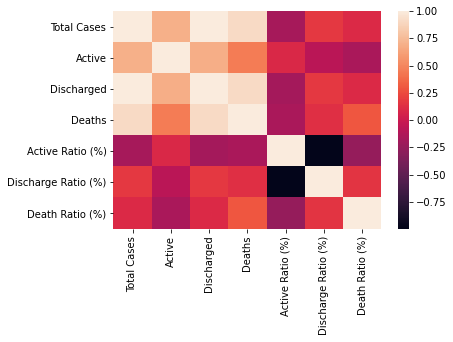

In [9]:
#correlations within dataset

sns.heatmap(df.corr())

# this heatmap showing correlations is obvious but also stresses that the number of
# deaths is highly correlated with the number of cases.
#KEEP COVID CASE NUMBERS LOW FOLKS!

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

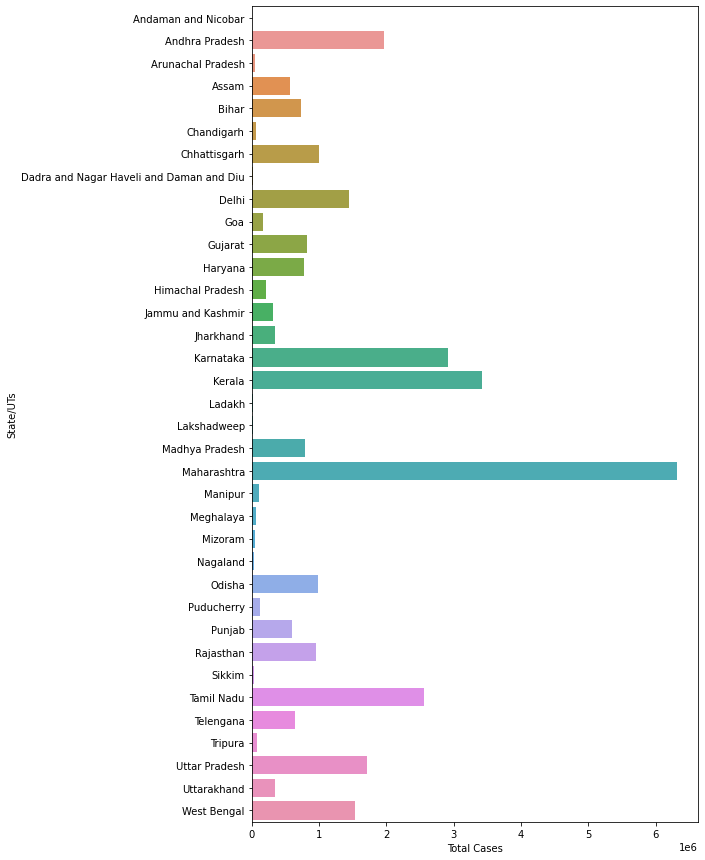

In [23]:
# the state of Maharashtra has the most total cases
plt.figure(figsize = (8,15))
sns.barplot(y = 'State/UTs', x = 'Total Cases', data = df)

<AxesSubplot:xlabel='Deaths', ylabel='State/UTs'>

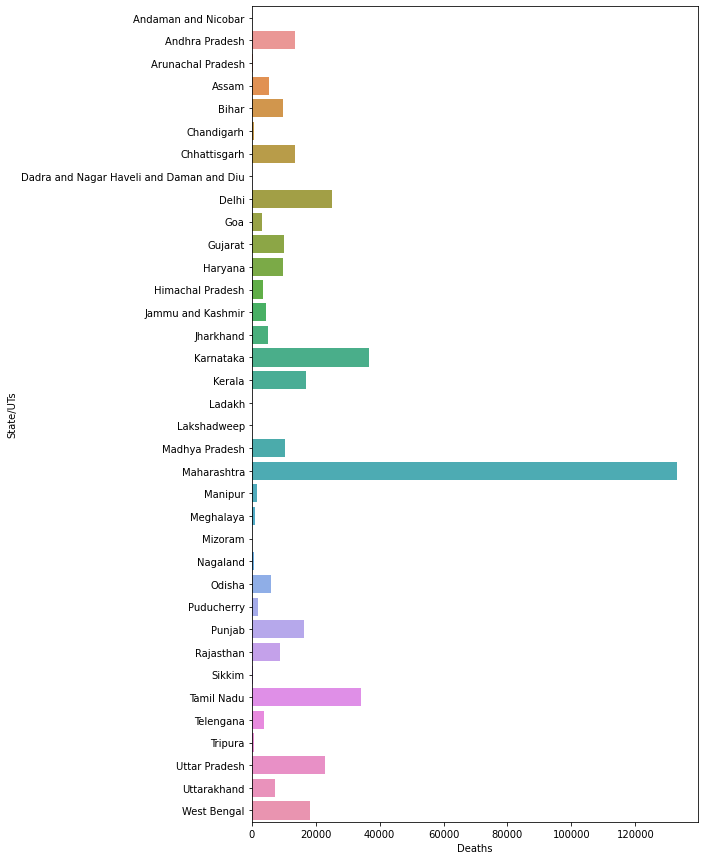

In [22]:
# the state of Maharashtra has the most deaths
plt.figure(figsize = (8,15))
sns.barplot(y = 'State/UTs', x = 'Deaths', data = df)

In [ ]:
# notice the total cases and total deaths plots do not quite match up. This is where we
# can employ the Death Ratio (%)

<AxesSubplot:xlabel='Death Ratio (%)', ylabel='State/UTs'>

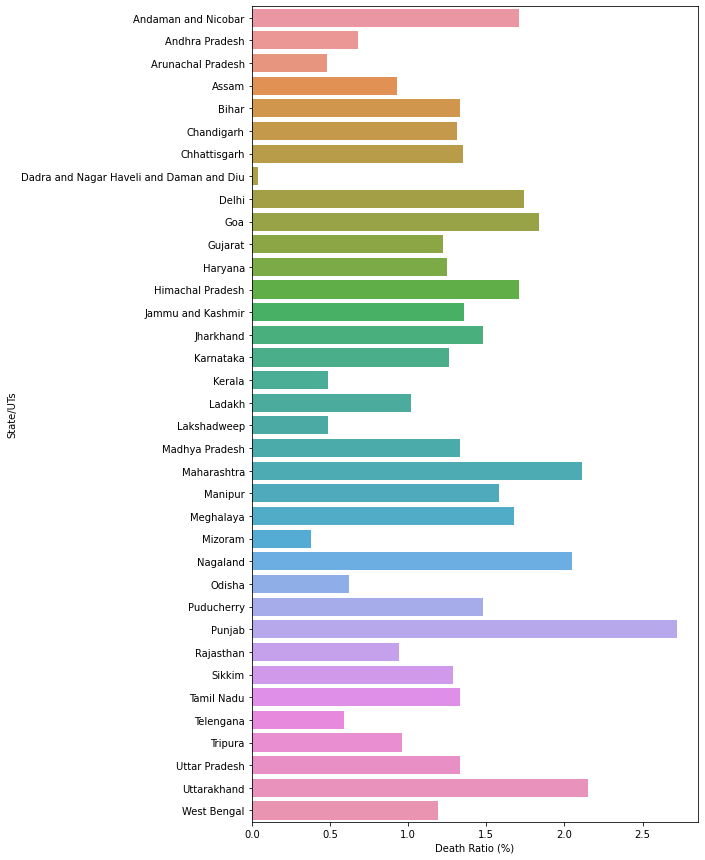

In [24]:
# Punjab and Uttarakhand, despite having relatively low case numbers, has the greatest death ratio
plt.figure(figsize = (8,15))
sns.barplot(y = 'State/UTs', x = 'Death Ratio (%)', data = df)

<AxesSubplot:xlabel='Discharge Ratio (%)', ylabel='State/UTs'>

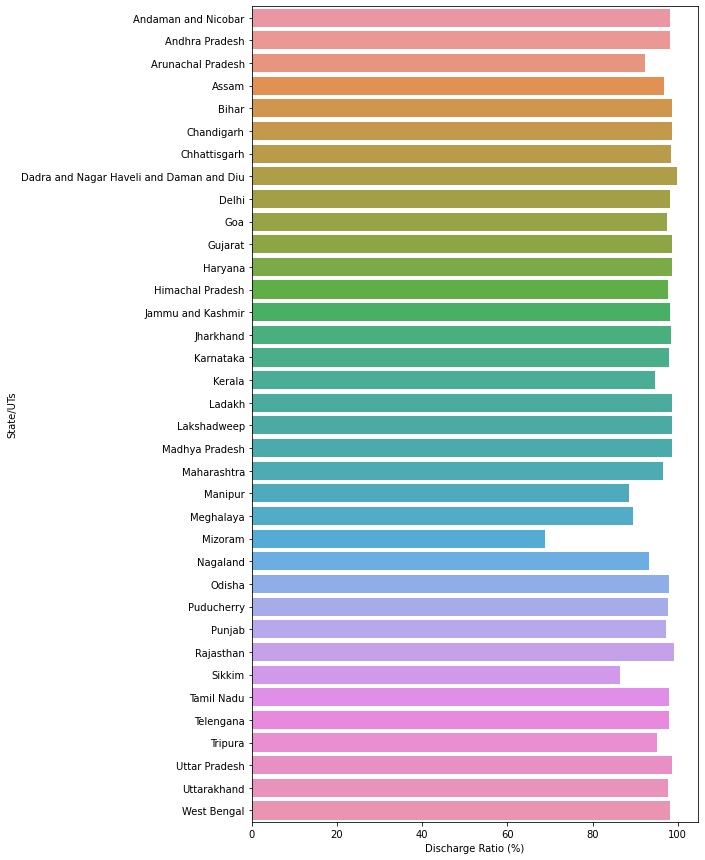

In [26]:
# on the other side of the coin, who is doing well healin patients - the discharge ratio. 
plt.figure(figsize = (8,15))
sns.barplot(x = 'Discharge Ratio (%)', y = 'State/UTs', data = df)

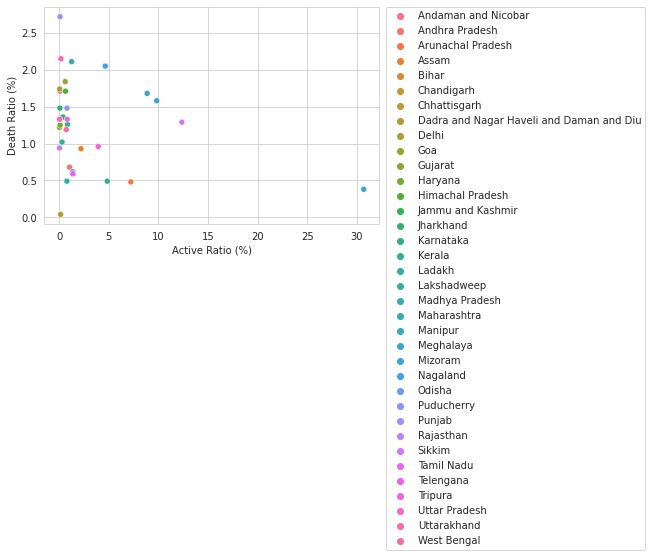

In [29]:
# death ratio and discharge ratio are not exactly correlated.
sns.set_style('whitegrid')
sns.scatterplot(x = 'Active Ratio (%)', y = 'Death Ratio (%)', data = df, hue = 'State/UTs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)